# Notebook 01: Gas-Liquid Mass Transfer

This notebook is part of the research paper titled:

Optimizing acetogenic CO(2) utilization through metabolic and process engineering highlights the potential of thermophilic bioproduction

# Gas-liquid mass transfer

This notebook expresses the transfer rates of the gaseous substrates from the gas to the liquid phase as a function of temperature. This transfer accross the phase boundary is modelled using film theory.

Notebook author: Philip J. Gorter de Vries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import Image

## Bubble column setup:

Before calculating transfer rates of compounds, it important to determine the properties of the reactor. The reactor setup used in the simulations is based on Redl et al. 30-meter-tall bubble column reactor with a radius of 3 meters, filled to 2/3 of its volume. It is continuously fed with 10 000 m3/h of syngas, which is assumed to consist of 40% CO, 20% CO2, and 40% H2. 

The temperature range used is between 0-80°C, corresponding to 273.15-353.15K. 

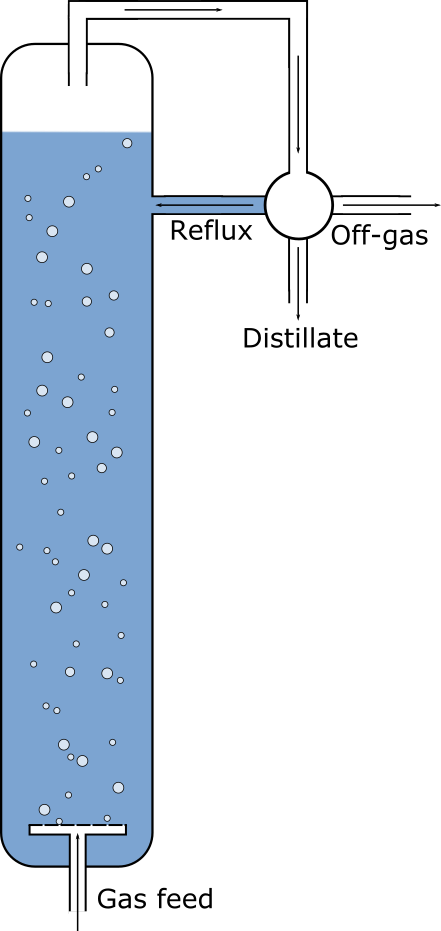

In [2]:
#Universal constants:
R = 8.314 # 

#Temperature range:
T0 = 273.15
dt = 80

T = np.arange(T0, T0+dt+1, 1)

def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

F_G = 1*10**4 #gas inflow rate (from Steph: (8*10**5 * 8.314 * T)/p_m) [m^3/h]
r = 3 # radius of the reactor [m]
h = 30 # height of the reactor [m]

#deduceable constants
A = math.pi * r**2 #reactor cross-sectional area [m^2]
V_L = A * h * 2/3 #reactor volume, assuming it is 2/3 filled [m^3]
v_gas = F_G/A/3600 #average gas velocity [m/s]
Gas_holdup = 0.6*(v_gas)**0.7 #from Stephanie's paper
V_G = V_L*Gas_holdup

p_t = 101325 # pressure at the top of the reactor [Pa]
p_b = p_t + h * 2/3 * 1000 * 9.81 # pressure at the bottom of the reactor [Pa]
p_m = (p_b-p_t)/math.log(p_b/p_t) # logarithmic mean pressure [Pa]

#define concentration of disolved gasses as minimum
c_co2 = c_co = c_h2 = c_o2 = 0

Image(filename='../Figures/BubbleColumnSingle.png', width = 200)

### Process Parameters
Further parameters, including the superficial gas velocity (vcgs), the liquid volume (VL), the gas holdup fraction (ε), the pressure at the bottom of the tank (Pb), and the logarithmic mean pressure (Pm) can be defined from the basic properties of the reactor (eq. 1-5).

<p> Superficial gas velocity: </p>
<div style="text-align: center">  $ v^c_{gs} = F_av/(\pi * r^2)/3600 $ [m/s]
    <span style="float:right;">(eq. 1)</span>
</div>

<p> Liquid volume, assuming 2/3 filled: </p> 
<div style="text-align: center">  $ V_L = π * r^2 * h * 2/3 $ [$m^3$]
    <span style="float:right;">(eq. 2)</span>
</div>

<p> Gas holdup fraction: </p> 
<div style="text-align: center">  $ \varepsilon = 0.6*(v^c_{gs})^{0.7} $     
    <span style="float:right;">(eq. 3)</span>
</div>

<p> Pressure at the bottom, assuming 2/3 filled: </p> 
<div style="text-align: center">  $ P_b = P_t + h * 2/3 * 1000 * g $ [Pa]
    <span style="float:right;">(eq. 4)</span>
</div>

<p> Logarithmic mean pressure: </p> 
<div style="text-align: center">  $ P_m = (P_b-P_t)/log(P_b/P_t) $ [Pa]
    <span style="float:right;">(eq. 5)</span>
</div>


Where:
- $F_av$: Average gas flow rate ($m^{3}/h)$
- $r$: reactor radius (m)
- $P_b$: reactor bottom pressure (Pa)
- $P_t$: reactor top pressure (Pa)

# Define gas transfer rates as functions of temperature

The transfer of a compound across a phase boundary can be modelled using film theory. In film theory, the division between two phases is seen as a boundary where each phase forms a film providing resistance to the mass transfer. The mass transfer through each of the boundary films (R) can be expressed for any compound as a function of a coefficient (k), the surface area of the interface (a), and the concentration difference (Δc) between the bulk of the phase and the interface (eq. 6). Here the diffusivity coefficient, gas solubility and temperature correction factor are defined for the different gasses of interest: $CO$, $CO_{2}$, $H_{2}$, $O_{2}$ and $N_{2}$. 

<p> Transfer rate: </p>
<div style="text-align: center">  $ R = k_L * a * \Delta c $ [$mol/m^3/s$]
    <span style="float:right;">(eq. 6)</span>
</div>

<p> Transfer rate: </p>
<div style="text-align: center">  $ R_{i} = k_La_T*(c^* -c_l) $ [$mol/m^3/s$]
    <span style="float:right;">(eq. 7)</span>
</div>

<p> Volumetric mass transfer coefficient: </p>
<div style="text-align: center">  $ k_La_{20} = 0.32 * (D_i/D_{O_2})^{0.5} * (v^c_{gs})^{0.7} $ [$1/s$]
    <span style="float:right;">(eq. 8)</span>
</div>

<p> Temperature corrected volumetric mass transfer coefficient: </p>
<div style="text-align: center">  $ k_La_T = k_La_{20} * \theta ^{T-293.15} $ [$1/s$]
    <span style="float:right;">(eq. 9)</span>
</div>

<p> Saturation concentration: </p>
<div style="text-align: center">  $ c^* = H_T*y*P $ [$mol/m^3$]
    <span style="float:right;">(eq. 10)</span>
</div>

<p> Temperature-corrected Henry’s law constant: </p>
<div style="text-align: center">  $ H_T = H_0*e^{[k_H*((1/T)-(1/298.15))]} $ [$mol/m^3*Pa$]
    <span style="float:right;">(eq. 11)</span>
</div>

<!--<p> Combined: </p>
<div style="text-align: center">  $ k_La_T = 0.32 * (D_i/D_{O_2})^{0.5} * (v^c_{gs})^{0.7} * \theta ^{T-293.15} $ </div>
<div style="text-align: center">  $ c^* = H_0*e^{[k_H*((1/T)-(1/298.15))]}*10^3*y*P $ </div>-->

where:
- $k_La_T$: Volumetric mass transfer coefficient at temperature T (1/s)
- $c^*$: Saturation concentration ($mol/m^{3}$)
- $c_l$: Concentration of gas in the liquid ($mol/m^{3}$)
- $k_La_{20}$: Volumetric mass transfer coefficient at 20 C (1/s)
- $D_i$: Diffusion coefficient ($m^{2}/s$)
- $D_{O_2}$: Diffusion coefficient of oxygen ($m^{2}/s$)
- $v^c_{gs}$: Superficial gas velocity (m/s)
- $T$: Temperature (K)
- $\theta$: temperature correction factor
- $H_T$: Temperature corrected Henry's law constant ($mol/(m^{3}·Pa)$)
- $y$: Mol fraction (mol/mol)
- $P$: Pressure (Pa)
- $H_0$: Temperature corrected Henry's law constant at 0K ($mol/(m^{3}·Pa)$)
- $k_H$: Henry's law temperature correction factor (K)

In [3]:
# Load Henry's Law Constants:
DR = pd.read_csv("../Data/HenrysLawData.csv", index_col = "Compound")["DR"]
HR = pd.read_csv("../Data/HenrysLawData.csv", index_col = "Compound")["HR"]
kh = pd.read_csv("../Data/HenrysLawData.csv", index_col = "Compound")["k"]
theta = 1.022 # temperature correction factor

## Define and plot the volumetric mass transfer coefficient KLa
Below, the effect of temperature on the volumetric mass transfer coefficient is calculated.

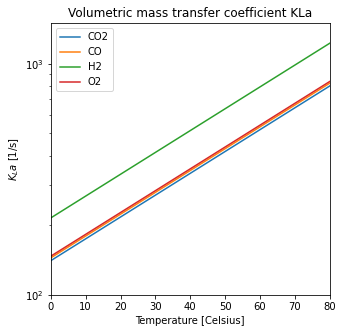

In [4]:
def KLa(C,T):
    return 0.32 * (DR[C]/DR["O2"])**0.5 * v_gas**0.7 * theta**(T-293.15) * 3600 #[1/s]

fig = plt.figure(figsize=(5,5))
plt.title(f"Volumetric mass transfer coefficient KLa")
plt.plot(Kelvin_Celsius(T), KLa("CO2",T))
plt.plot(Kelvin_Celsius(T), KLa("CO",T))
plt.plot(Kelvin_Celsius(T), KLa("H2",T))
plt.plot(Kelvin_Celsius(T), KLa("O2",T))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 100, 1500])
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'$K_La$ [1/s]')
plt.yscale('log')

plt.show()

## Define and plot the saturation concentration as a function of temperature

The change in saturation concentration for each gas can be determined by combining eq.10 and 11, correcting Henry's Law constant by temperature in the same function. In this case, the saturation concentration of pure gases is compared, so the mole fraction is 1.

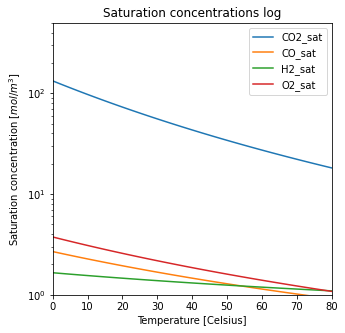

In [5]:
def Csat(C, T, y):
    return HR[C] * math.e**(kh[C]*(1/T-1/298.15)) * 10**(-5) * p_m * y

t = np.arange(293.15, 335.15, 1)

fig = plt.figure(figsize=(5,5))
plt.title(f"Saturation concentrations log")
plt.plot(Kelvin_Celsius(T), Csat("CO2",T, 1))
plt.plot(Kelvin_Celsius(T), Csat("CO",T, 1))
plt.plot(Kelvin_Celsius(T), Csat("H2",T, 1))
plt.plot(Kelvin_Celsius(T), Csat("O2",T, 1))
plt.legend(['CO2_sat', 'CO_sat', 'H2_sat', 'O2_sat'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 1, 500])
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'Saturation concentration [$mol/m^3$]')
plt.yscale('log')

plt.show()

## Define and plot the volumetric gas transfer rates as a function of temperature

The calculations for the kLa and the saturation concentration can be combined into the overall mass transfer rate.

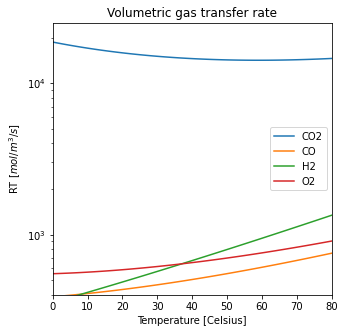

H2 fold increase 30-80˚C:  2.35
CO2 fold increase 30-80˚C:  0.97
CO fold increase 30-80˚C:  1.62
O2 fold increase 30-80˚C:  1.47


In [6]:
def RT(C,T,c,y):
    return KLa(C,T) * (Csat(C,T, y) - c)

fig = plt.figure(figsize=(5,5))

plt.title(f"Volumetric gas transfer rate")
plt.plot(Kelvin_Celsius(T), RT("CO2",T,c_co2,1))
plt.plot(Kelvin_Celsius(T), RT("CO",T,c_co,1))
plt.plot(Kelvin_Celsius(T), RT("H2",T,c_h2,1))
plt.plot(Kelvin_Celsius(T), RT("O2",T,c_o2,1))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 400, 25000])
plt.yscale('log')
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'RT [$mol/m^3/s$]')

plt.show()

print("H2 fold increase 30-80˚C: ", round(RT("H2",Celsius_Kelvin(80),c_h2,1)/RT("H2",Celsius_Kelvin(30),c_h2,1),2))
print("CO2 fold increase 30-80˚C: ", round(RT("CO2",Celsius_Kelvin(80),c_co2,1)/RT("CO2",Celsius_Kelvin(30),c_co2,1),2))
print("CO fold increase 30-80˚C: ", round(RT("CO",Celsius_Kelvin(80),c_co,1)/RT("CO",Celsius_Kelvin(30),c_co,1),2))
print("O2 fold increase 30-80˚C: ", round(RT("O2",Celsius_Kelvin(80),c_o2,1)/RT("O2",Celsius_Kelvin(30),c_o2,1),2))

# Gathered Plots

The above plots are gathered for the publication

NameError: name 'CO2_sat' is not defined

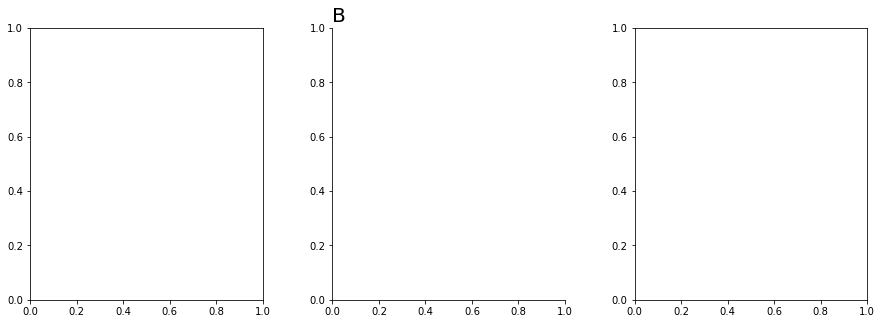

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, constrained_layout=False, figsize=(15,5))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

#Output results
plt.subplot(1,3,2)
#plt.title(f"Saturation concentrations")
plt.title("B", fontdict = {'fontsize': 20}, loc = "left")
plt.plot(Kelvin_Celsius(T), CO2_sat(T,1))
plt.plot(Kelvin_Celsius(T), CO_sat(T,1))
plt.plot(Kelvin_Celsius(T), H2_sat(T,1))
plt.plot(Kelvin_Celsius(T), O2_sat(T,1))
#plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 1, 200])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'Saturation concentration [$mol/m^3$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log')

plt.subplot(1,3,1)
#plt.title(f"Volumetric mass transfer coefficient KLa")
plt.title("A", fontdict = {'fontsize': 20}, loc = "left")
plt.plot(Kelvin_Celsius(T), KLa_CO2(T))
plt.plot(Kelvin_Celsius(T), KLa_CO(T))
plt.plot(Kelvin_Celsius(T), KLa_H2(T))
plt.plot(Kelvin_Celsius(T), KLa_O2(T))
#plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 100, 1500])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'$K_La$ [$1/s$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log')

plt.subplot(1,3,3)
#plt.title(f"Volumetric gas transfer rate")
plt.title("C", fontdict = {'fontsize': 20}, loc = "left")
plt.plot(Kelvin_Celsius(T), R_CO2(T,1))
plt.plot(Kelvin_Celsius(T), R_CO(T,1))
plt.plot(Kelvin_Celsius(T), R_H2(T,1))
plt.plot(Kelvin_Celsius(T), R_O2(T,1))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 400, 25000], )
plt.yscale('log')
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'RT [$mol/m^3/s$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)